# 케라스 창시자에게 배우는 딥러닝
## 3.장
### 3.5절 뉴스기사분류: 다중 분류 문제

In [24]:
import warnings
warnings.filterwarnings("ignore")

### 3.5.1 데이터 로딩

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [3]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [7]:
# 정수 리스트 이며, 이 정수는 단어의 인덱스
train_data[9]

[1,
 56,
 7224,
 81,
 40,
 1175,
 174,
 2,
 6,
 1793,
 10,
 266,
 3315,
 5,
 1574,
 799,
 317,
 65,
 136,
 277,
 801,
 7,
 429,
 65,
 182,
 199,
 8,
 174,
 201,
 2540,
 10,
 1806,
 5,
 401,
 20,
 1574,
 799,
 6,
 119,
 20,
 1574,
 1075,
 136,
 10,
 277,
 498,
 120,
 31,
 7224,
 13,
 251,
 18,
 428,
 90,
 289,
 4,
 199,
 8,
 4,
 5880,
 1806,
 23,
 124,
 20,
 799,
 317,
 6,
 482,
 20,
 1075,
 174,
 287,
 13,
 799,
 317,
 65,
 40,
 333,
 1398,
 224,
 4,
 137,
 130,
 2,
 356,
 8181,
 2,
 172,
 4,
 1150,
 3727,
 403,
 54,
 139,
 3045,
 692,
 31,
 6473,
 5,
 799,
 1306,
 9,
 2,
 2735,
 17,
 12]

#### 로이터 데이터셋 -> 텍스트로 디코딩

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 3.5.2 데이터 준비

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
print(x_train[:5])
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
x_train shape:  (8982, 10000)
x_test shape:  (2246, 10000)


In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

ohe_train_labels = to_one_hot(train_labels)
ohe_test_labels = to_one_hot(test_labels)

In [16]:
print(ohe_train_labels[:5])
print("ohe_train_labels shape: ", ohe_train_labels.shape)
print("ohe_test_labels shape: ", ohe_test_labels.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
ohe_train_labels shape:  (8982, 46)
ohe_test_labels shape:  (2246, 46)


In [17]:
# to_categorical 의 내장함수도 있다
from keras.utils.np_utils import to_categorical

ohe_train_labels = to_categorical(train_labels)
ohe_test_labels = to_categorical(test_labels)

print(ohe_train_labels[:5])
print("ohe_train_labels shape: ", ohe_train_labels.shape)
print("ohe_test_labels shape: ", ohe_test_labels.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
ohe_train_labels shape:  (8982, 46)
ohe_test_labels shape:  (2246, 46)


### 3.5.3 모델 구성
- Dense 층의 경우, 이전 층의 출력에서 제공한 정보만 사용할 수 있다.
- 이 때, 46개의 카테고리를 분류하는데 너무 적은 층을 사용하는 경우 정보의 누락이 발생한다. 정보의 누락이 발생했을 때, 이를 복원할 방법이 없다.
- information bottleneck 이 발생 될 수 있으므로, 충분히 여유 있는 갯수를 사용한다.

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

### 3.5.4 훈련 검증

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = ohe_train_labels[:1000]
partial_y_train = ohe_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 160us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 106us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.0953 - acc: 0.7655 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.8698 - acc: 0.8162 - val_loss: 1.0800 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.7036 - acc: 0.8473 - val_loss: 0.9848 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.5672 - acc: 0.8800 - val_loss: 0.9419 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.4587 - acc: 0.9044 - val_loss: 0.9085 - val_acc: 0.8010
Ep

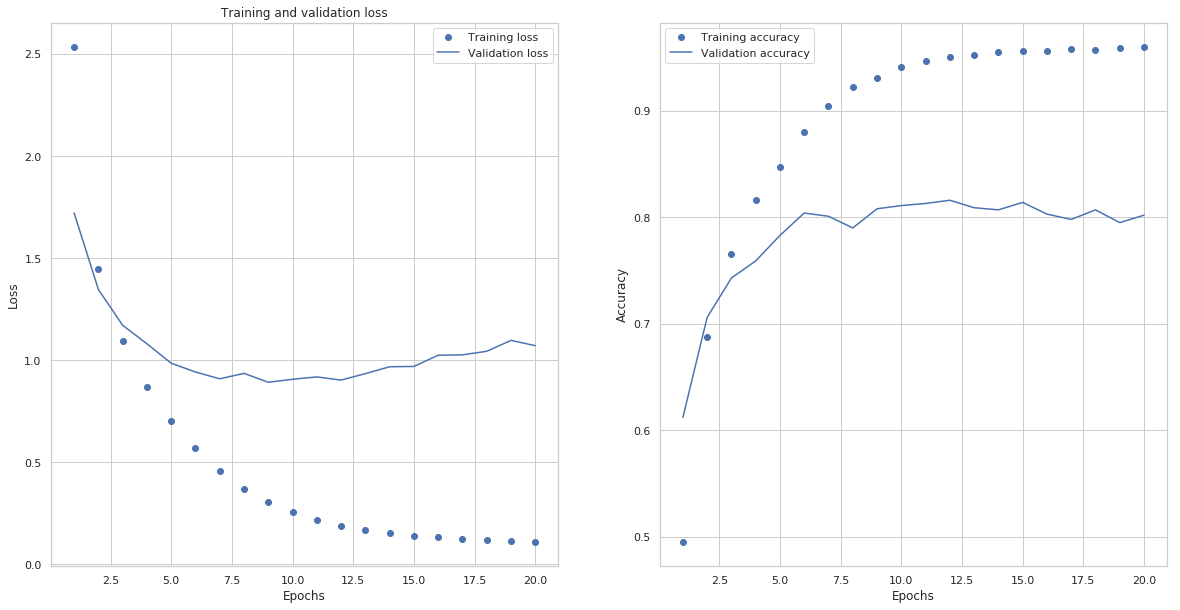

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 3.5.5 새로운 데이터에 대해 예측

In [45]:
predictions = model.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
predictions = [np.argmax(predict) + 1 for predict in predictions]

In [48]:
accuracy_score(test_labels, predictions)

0.025378450578806767

### p.s. Additional Experiment
- epochs 9 까지만하고 test score 확인해보기

In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 144us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 118us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 113us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 108us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [50]:
predictions = model.predict(x_test)
predictions = [np.argmax(predict) + 1 for predict in predictions]
accuracy_score(test_labels, predictions)

0.034728406055209264

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 103us/step - loss: 3.5482 - acc: 0.1854 - val_loss: 3.3074 - val_acc: 0.2370
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 3.1217 - acc: 0.2617 - val_loss: 2.9520 - val_acc: 0.2580
Epoch 3/20
7982/7982 [==============================] - 1s 75us/step - loss: 2.7363 - acc: 0.2809 - val_loss: 2.6180 - val_acc: 0.2830
Epoch 4/20
7982/7982 [==============================] - 1s 78us/step - loss: 2.3863 - acc: 0.3069 - val_loss: 2.3068 - val_acc: 0.3910
Epoch 5/20
7982/7982 [==============================] - 1s 74us/step - loss: 2.0425 - acc: 0.5784 - val_loss: 1.9909 - val_acc: 0.6020
Epoch 6/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.7315 - acc: 0.6377 - val_loss: 1.7596 - val_acc: 0.6140
Epoch 7/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.5135 - acc: 0.6531 - val_loss: 1.6278 - val_acc: 0.6280
Epoch 

### ps Additional Experiment
#### 1. 128개의 유닛

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 142us/step - loss: 2.4488 - acc: 0.5020 - val_loss: 1.6202 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.3459 - acc: 0.7048 - val_loss: 1.2726 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.0031 - acc: 0.7814 - val_loss: 1.1092 - val_acc: 0.7750
Epoch 4/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.7790 - acc: 0.8334 - val_loss: 1.0215 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.6036 - acc: 0.8693 - val_loss: 0.9544 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.4677 - acc: 0.9004 - val_loss: 0.9157 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.3685 - acc: 0.9225 - val_loss: 0.9116 - val_acc: 0.8180


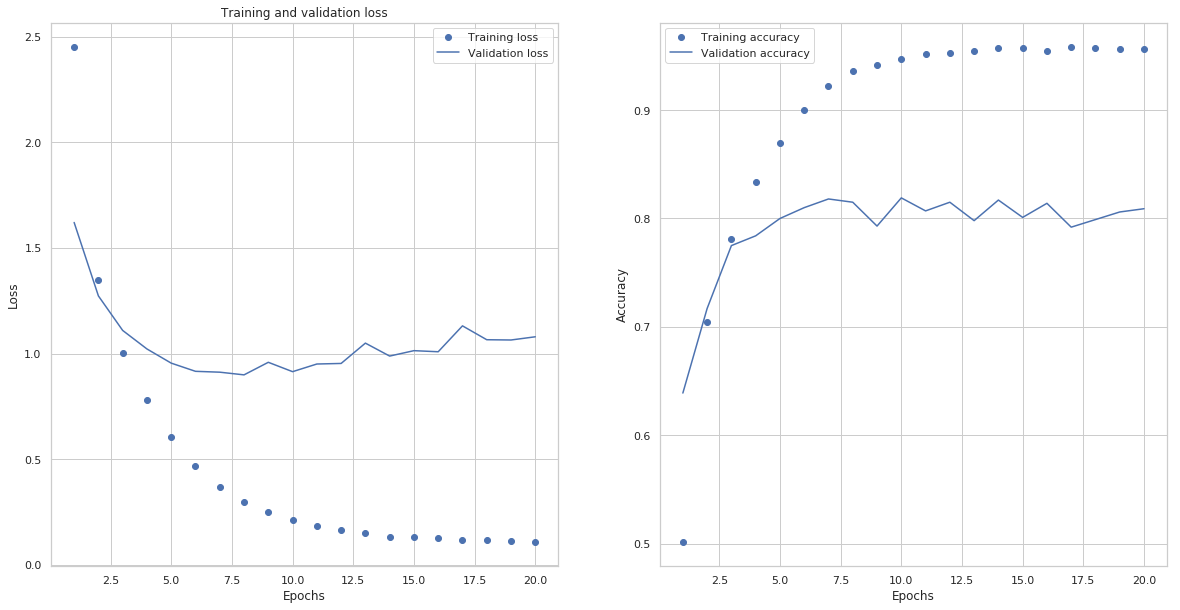

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 2. 64개 유닛, 2개의 은닉층

In [54]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.6176 - acc: 0.5395 - val_loss: 1.6700 - val_acc: 0.6600
Epoch 2/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.3802 - acc: 0.7052 - val_loss: 1.2999 - val_acc: 0.7270
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.0510 - acc: 0.7666 - val_loss: 1.2103 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8425 - acc: 0.8120 - val_loss: 1.0863 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.6695 - acc: 0.8494 - val_loss: 1.0889 - val_acc: 0.7390
Epoch 6/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.5406 - acc: 0.8795 - val_loss: 0.9628 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.4347 - acc: 0.9005 - val_loss: 0.9762 - val_acc: 0.7980
Ep

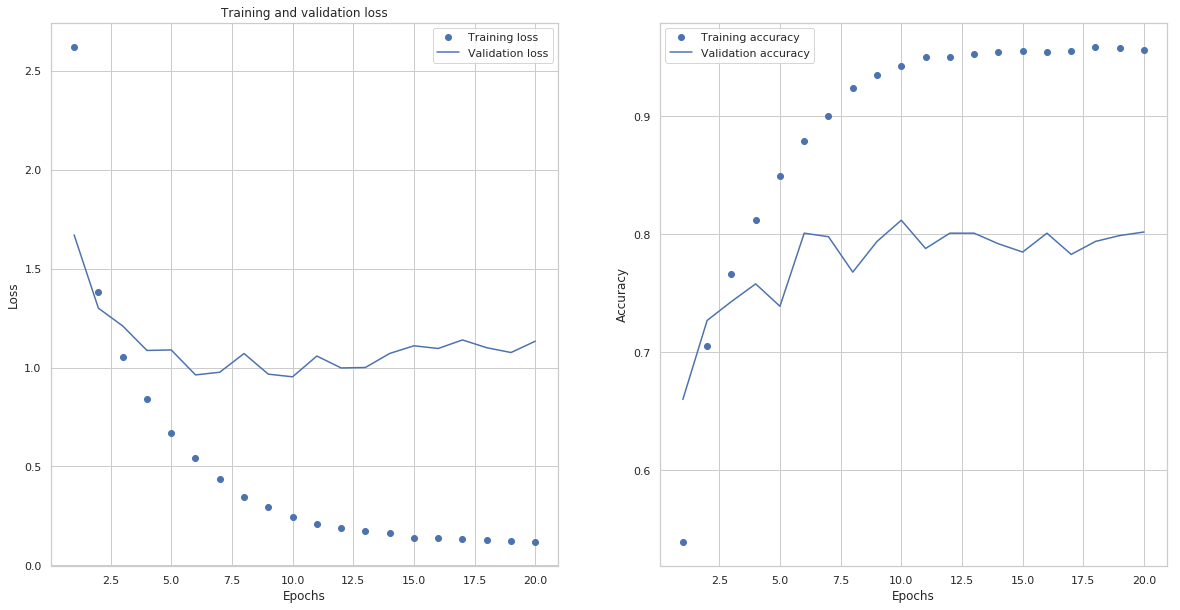

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 3. 64개 유닛, 3개의 은닉층

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 126us/step - loss: 2.9018 - acc: 0.4297 - val_loss: 1.8531 - val_acc: 0.5900
Epoch 2/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.5246 - acc: 0.6681 - val_loss: 1.3851 - val_acc: 0.6990
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.1555 - acc: 0.7274 - val_loss: 1.2431 - val_acc: 0.7150
Epoch 4/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.9253 - acc: 0.7860 - val_loss: 1.1500 - val_acc: 0.7470
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.7385 - acc: 0.8294 - val_loss: 1.0577 - val_acc: 0.7740
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.6075 - acc: 0.8589 - val_loss: 1.1095 - val_acc: 0.7610
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.4908 - acc: 0.8869 - val_loss: 1.1188 - val_acc: 0.7810
Epoch

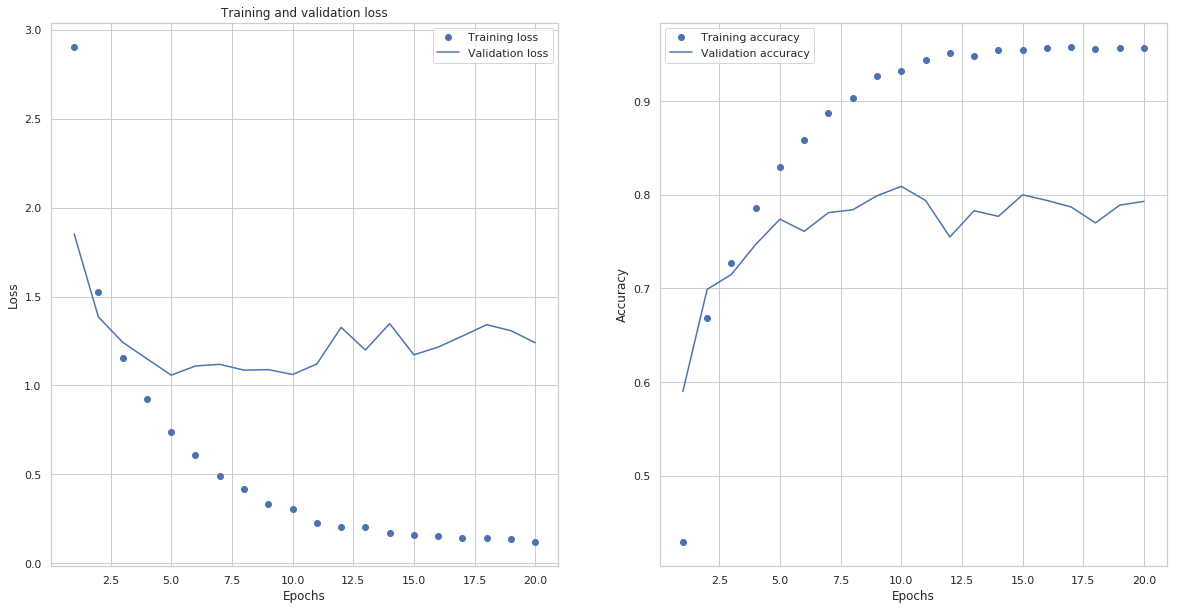

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()